In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from anytree import Node, RenderTree, AsciiStyle
import squarify

# Trees

### Node link diagram (Classic tree)

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_10604\43599690.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


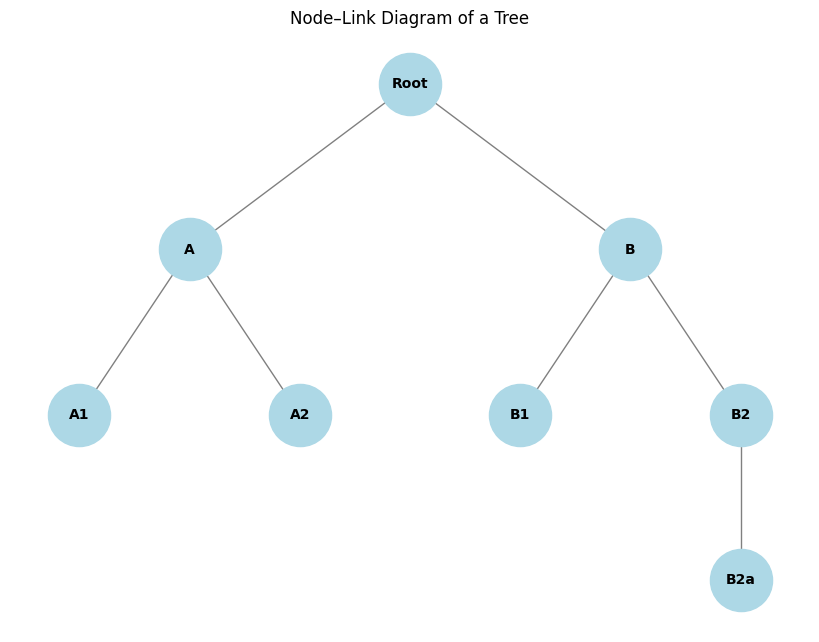

In [2]:
def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if parent is not None:   # remove the edge back to parent
        children.remove(parent)
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                vert_loc=vert_loc-vert_gap, xcenter=nextx,
                                pos=pos, parent=root)
    return pos

edges = [
    ("Root", "A"),
    ("Root", "B"),
    ("A", "A1"),
    ("A", "A2"),
    ("B", "B1"),
    ("B", "B2"),
    ("B2", "B2a"),
]

T = nx.Graph()
T.add_edges_from(edges)

# 2) Compute positions with a top-down hierarchy
pos = hierarchy_pos(T, root="Root")

# 3) Draw
plt.figure(figsize=(8, 6))
nx.draw(
    T, pos,
    with_labels=True,
    node_size=2000,
    node_color="lightblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)
plt.title("Node–Link Diagram of a Tree")
plt.axis("off")
plt.tight_layout()
plt.show()

## This can be used to draw tree diagram for 
- Binary Trees
- B and B+ Trees
- Tries
- Heap
- Quad Tree
etc

## Indented Tree

In [3]:
# Using anytree
root = Node("Root")
a    = Node("A", parent=root)
a1   = Node("A1", parent=a)
a2   = Node("A2", parent=a)

b    = Node("B", parent=root)
b1   = Node("B1", parent=b)
b2   = Node("B2", parent=b)
b2a  = Node("B2a", parent=b2)

for pre, fill, node in RenderTree(root, style=AsciiStyle()):
    print(f"{pre}{node.name}")


Root
|-- A
|   |-- A1
|   +-- A2
+-- B
    |-- B1
    +-- B2
        +-- B2a


In [4]:
# Custom implementation
class TreeNode:
    def __init__(self, name):
        self.name = name
        self.children = []

    def add_child(self, node):
        self.children.append(node)

def render_tree(node, prefix="", is_last=True, depth=0):
    """Recursively prints an ASCII tree with ├── and └── connectors."""
    if depth == 0:
        # Root node, no connector
        print(node.name)
    else:
        connector = "└── " if is_last else "├── "
        print(prefix + connector + node.name)

    # Prepare prefix for children
    if depth > 0:
        # extend existing prefix
        prefix += "    " if is_last else "│   "
    else:
        # first level, start prefix fresh
        prefix = ""

    # Recurse into children
    child_count = len(node.children)
    for idx, child in enumerate(node.children):
        is_last_child = (idx == child_count - 1)
        render_tree(child, prefix, is_last_child, depth+1)

# --- Build the toy tree ---
root = TreeNode("Root")

a = TreeNode("A")
a.add_child(TreeNode("A1"))
a.add_child(TreeNode("A2"))

b = TreeNode("B")
b.add_child(TreeNode("B1"))
b2 = TreeNode("B2")
b2.add_child(TreeNode("B2a"))
b.add_child(b2)

root.add_child(a)
root.add_child(b)

# --- Render it ---
render_tree(root)


Root
├── A
│   ├── A1
│   └── A2
└── B
    ├── B1
    └── B2
        └── B2a


Where to use this?

Indented trees can be used to visualize Abstract Syntax Trees (AST). See below example where a simple custom l;language syntax is visualized

Syntax

`NODE <ARROW> NODE | NODE, NODE, ...NODE`

Ex language:
```
A -> B
B -> C, D
C -> E
```

In [13]:
from anytree import Node, RenderTree, AsciiStyle

def parse_rules(text):
    """
    Parse lines like "A -> B, C" into a dict: { "A": ["B","C"], ... }
    """
    rules = {}
    for line in text.strip().splitlines():
        parent, kids = line.split("->")
        parent = parent.strip()
        children = [c.strip() for c in kids.split(",") if c.strip()]
        rules[parent] = children
    return rules

def find_roots(rules):
    """
    Roots are nodes that never appear as children.
    """
    all_nodes = set(rules)
    children = {c for kids in rules.values() for c in kids}
    return list(all_nodes - children)

def build_tree(name, rules, parent=None):
    """
    Recursively build an anytree Node hierarchy.
    """
    node = Node(name, parent=parent)
    for child in rules.get(name, []):
        build_tree(child, rules, node)
    return node

if __name__ == "__main__":
    src = """
    A -> B
    B -> C
    C -> D, E, F
    F -> G
    H -> I
    """
    # 1) Parse the rule definitions
    rules = parse_rules(src)

    # 2) Find all top-level roots (forest heads)
    roots = find_roots(rules)

    # 3) Create a dummy super-root and hang each forest root under it
    super_root = Node("ROOT")
    for rname in roots:
        build_tree(rname, rules, super_root)

    # 4) Render and print the combined tree
    for pre, _, node in RenderTree(super_root, style=AsciiStyle()):
        print(pre + node.name)


ROOT
|-- H
|   +-- I
+-- A
    +-- B
        +-- C
            |-- D
            |-- E
            +-- F
                +-- G


A more concrete example would be building AST for showing how operations in BODMAS is done via a simple Calculator Parser

Example
for expression
`(1 + 2) - 3 * (7 / 4 + (5 - 7))`

The AST for pre-order traversal would be

```txt
-
├── +
│   ├── 1
│   └── 2
└── *
    ├── 3
    └── +
        ├── /
        │   ├── 7
        │   └── 4
        └── -
            ├── 5
            └── 7
```
Visualizing a math expression in this tree form will be your assignment.

### Radial Tree

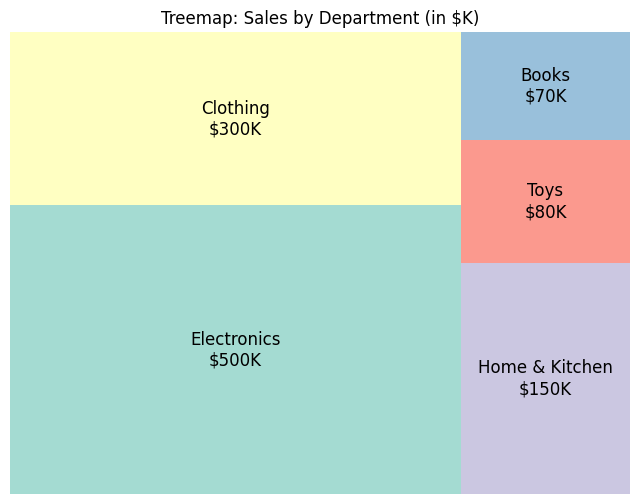

In [6]:
# 1. Example data: sales (in thousands) by department
labels = [
    "Electronics\n$500K",
    "Clothing\n$300K",
    "Home & Kitchen\n$150K",
    "Toys\n$80K",
    "Books\n$70K"
]
sizes = [500, 300, 150, 80, 70]  # corresponding values
colors = plt.cm.Set3(range(len(labels)))  # a colormap

# 2. Plot the treemap
plt.figure(figsize=(8, 6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':12}
)
plt.title("Treemap: Sales by Department (in $K)")
plt.axis('off')  # no axes for a cleaner look
plt.show()